<a href="https://colab.research.google.com/github/mathzmatos/Iniciacao-Cientifica-2022/blob/master/Inicia%C3%A7%C3%A3o_Cientifica_Gasolina_e_Dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iniciação Científica sobre Gasolina e Dolar.
Matheus Matos
https://github.com/mathzmatos

IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 199 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
!pip -q install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from imblearn.over_sampling import SMOTE


In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dadosGasDolar = pd.read_csv('/content/dados_gas_dolar.csv')

In [7]:
dadosGasDolar

,Ano,Mes,Gasolina_PrecoMedio,Gasolina_DesvioPadrao,Gasolina_Min,Gasolina_Max,Valor_Dolar
0,2017,Maio,3.617,0.252,2.96,4.999,3.126
1,2017,Junho,3.548,0.269,2.88,4.799,3.101
2,2017,Julho,3.553,0.304,2.799,4.95,3.283
3,2017,Agosto,3.781,0.265,2.999,5.1,3.189
4,2017,Agosto,3.781,0.265,2.999,5.1,3.189
...,...,...,...,...,...,...,...
59,2022,Janeiro,6.635,0.368,5.489,8.029,5.712
60,2022,Fevereiro,6.600,0.383,5.579,7.999,5.534
61,2022,Marco,7.012,0.505,5.19,8.949,5.188
62,2022,Abril,7.245,0.407,6.099,8.599,5.131


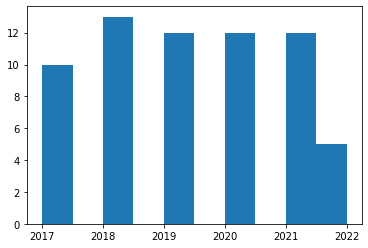

In [ ]:
plt.hist(x = dadosGasDolar['Ano']);

In [ ]:
grafico = px.scatter_matrix(dadosGasDolar, dimensions=['Ano', 'Mes', 'Gasolina_PrecoMedio'], color = 'Valor_Dolar')
grafico.show()

Média do Valor do Dolar entre 2017 e 2022

In [ ]:
dadosGasDolar['Valor_Dolar'].mean()

4.316015624999998

In [ ]:
dadosGasDolar.isnull().sum()

Ano                      0
Mes                      0
Gasolina_PrecoMedio      0
Gasolina_DesvioPadrao    0
Gasolina_Min             0
Gasolina_Max             0
Valor_Dolar              0
dtype: int64

In [ ]:
grafico = px.treemap(dadosGasDolar, path=['Ano', 'Valor_Dolar', 'Gasolina_PrecoMedio'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(dadosGasDolar, dimensions=['Ano', 'Mes', 'Gasolina_PrecoMedio'])
grafico.show()

In [ ]:
dadosGasDolar.columns

Index(['Ano', 'Mes', 'Gasolina_PrecoMedio', 'Gasolina_DesvioPadrao',
       'Gasolina_Min', 'Gasolina_Max', 'Valor_Dolar'],
      dtype='object')

In [ ]:
X_dados = dadosGasDolar.iloc[:, 0:6].values

In [ ]:
X_dados

array([[2017, 'Maio', 3.617, '0.252', '2.96', '4.999'],
       [2017, 'Junho', 3.548, '0.269', '2.88', '4.799'],
       [2017, 'Julho', 3.553, '0.304', '2.799', '4.95'],
       [2017, 'Agosto', 3.781, '0.265', '2.999', '5.1'],
       [2017, 'Agosto', 3.781, '0.265', '2.999', '5.1'],
       [2017, 'Setembro', 3.881, '0.253', '3.099', '5.2'],
       [2017, 'Setembro', 3.881, '0.253', '3.099', '5.2'],
       [2017, 'Outubro', 3.895, '0.25', '3.199', '5.2'],
       [2017, 'Novembro', 4.004, '0.261', '3.199', '5.2'],
       [2017, 'Dezembro', 4.085, '0.256', '3.399', '5.2'],
       [2018, 'Janeiro', 4.189, '0.268', '3.499', '5.15'],
       [2018, 'Fevereiro', 4.208, '0.268', '3.479', '5.2'],
       [2018, 'Marco', 4.199, '0.283', '3.479', '5.2'],
       [2018, 'Abril', 4.215, '0.292', '3.397', '5.2'],
       [2018, 'Maio', 4.314, '0.307', '3.369', '5.459'],
       [2018, 'Junho', 4.552, '0.271', '3.599', '5.599'],
       [2018, 'Julho', 4.492, '0.294', '3.649', '5.599'],
       [2018, 'Agos

In [ ]:
X_dados[0]

array([2017, 'Maio', 3.617, '0.252', '2.96', '4.999'], dtype=object)